Clayton Cohn<br>
April 21, 2020<br>
DSC 478<br>
Prof. Mobasher

# Assignment 2

1. K-Nearest-Neighbor (KNN) classification on Newsgroups [Dataset: newsgroups.zip]

In [1]:
import pandas as pd

DATA_PATH = "/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/newsgroups/"

__1. For this problem you will use a subset of the 20 Newsgroup data set.__<br>
- The full data set contains 20,000 newsgroup documents
- Partitioned (nearly) evenly across 20 different newsgroups  
- The assignment data set contains a subset of 1000 documents and a vocabulary of  5,500 terms 
- Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0)
- The data has already been split (80%, 20%) into training and test data
- The class labels for the training and test data are also provided in separate files
- The training and test data are on term x document format: row for each term, column for each document. 
- The values in the table represent raw term occurence counts. 
- The data has already been preprocessed to extract tokens, remove stop words and perform stemming (so, the terms in the vocabulary are stems not full terms). 
- Please be sure to read the readme.txt file in the distribution.

In [2]:
#Preset training data
train_data = pd.read_table(DATA_PATH + "trainMatrixModified.txt", header=None)
train_labels = pd.read_table(DATA_PATH + "trainClasses.txt", header=None, index_col=0)
train_labels.head()

,1
0,
0,0
1,1
2,0
3,1
4,0


In [3]:
#Preset testing data
test_data = pd.read_table(DATA_PATH + "testMatrixModified.txt", header=None)
test_labels = pd.read_table(DATA_PATH + "testClasses.txt", header=None, index_col=0)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_data.shape

(5500, 800)

In [5]:
test_data.shape

(5500, 200)

In [6]:
#Convert training and testing data from TD to DT
dt_train = train_data.T
dt_test = test_data.T
dt_train.head()

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Your tasks in this problem are the following:<br><br>
[Note: for this problem you should not use scikit-learn for classification, but create your own KNN classifer. You may use Pandas, NumPy, standard Python libraries, and Matplotlib.]

Create your own KNN classifier function.<br><br>
Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the indices of the top K neighbors. <br><br>
Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function.

In [7]:
import numpy as np

# kNN search method from the lecture slides
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

In [8]:
# kNN classify method from the lecture slides
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    return count.most_common(1)[0][0]

Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances) [See class notes: Classification & Prediction - Review of Basic Concepts].

In [9]:
def knn_evaluate(test_data, test_labels, train_data, train_labels, K, measure):
    total = len(test_data)
    correct = 0
    for i in range(len(test_data)):
        label = knn_classify(test_data[i],train_data,K,train_labels,measure)
        if label == test_labels[i]: 
            correct += 1
    return correct/total

Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis.

In [10]:
# Data prep
dtm_train = np.array(dt_train)
dtm_test = np.array(dt_test)
train_labels_arr = np.array(train_labels).flatten()
test_labels_arr = np.array(test_labels).flatten()

In [11]:
%%time

#Euclidean
euclidean_reg = []
for K in range (5,101,5):
    euclidean_reg.append(knn_evaluate(dtm_test,test_labels_arr,dtm_train,train_labels_arr,K,0))

CPU times: user 1min 1s, sys: 10.4 s, total: 1min 11s
Wall time: 1min 11s


In [12]:
%%time

# Cosine 
cosine_reg = []
for K in range (5,101,5):
    cosine_reg.append(knn_evaluate(dtm_test,test_labels_arr,dtm_train,train_labels_arr,K,1))

CPU times: user 1min 25s, sys: 189 ms, total: 1min 25s
Wall time: 43.5 s


Use a single plot to compare the two version of the classifier (Eculidean distance version vs. cosine similarity version).

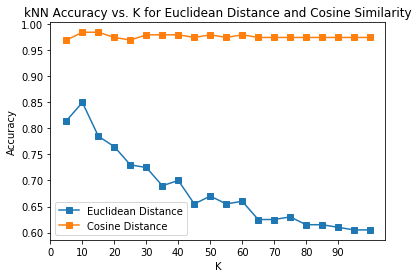

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(5, 101, 5))

plt.plot(x, euclidean_reg, label='Euclidean Distance', marker="s") 
plt.plot(x, cosine_reg, label='Cosine Distance',marker="s") 

plt.xlabel('K')
plt.xticks(range(0,100,10))

plt.ylabel('Accuracy') 
plt.title('kNN Accuracy vs. K for Euclidean Distance and Cosine Similarity')
plt.legend(loc = 'best') 
plt.show()

Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation (only for the Cosine similairty version of the classifier) on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [14]:
nTerms = dtm_train.shape[1]
nTerms

5500

In [15]:
nDocs = dtm_train.shape[0]
nDocs

800

In [16]:
# Get the doc counts for each term
doc_terms = pd.DataFrame([(train_data!=0).sum(1)]).T

In [17]:
# Create a matrix with all of the entries (nDocs)
nMatrix = np.ones(np.shape(train_data), dtype=float) * nDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(nMatrix)

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


In [18]:
# Map array to IDF values (IDF = log of inverse of document freq)
# IDF only a function of term, so all columns will be the same.

IDF = np.log2(np.divide(nMatrix, np.array(doc_terms)))
IDF[0:5]

array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
       [6.84, 6.84, 6.84, ..., 6.84, 6.84, 6.84],
       [6.32, 6.32, 6.32, ..., 6.32, 6.32, 6.32],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [2.89, 2.89, 2.89, ..., 2.89, 2.89, 2.89]])

In [19]:
# Compute TFxIDF values for each document-term entry. This is our matrix.
TD_tfidf = train_data * IDF
TD_tfidf.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
4374,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2449,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3101,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3537,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3402,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,0.0,0.0,0.0,0.0,0.0,0.0,4.785875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2767,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3500,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# kNN Search needs document by term matrix as np array, so we need to transpose
DT_tfidf = TD_tfidf.T
dtm_train_idf = np.array(DT_tfidf)
dtm_train_idf

array([[ 8.  , 13.67, 12.64, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [21]:
def knn_evaluate_idf(test_data, test_labels, train_data, train_labels, K, measure):
    total = len(test_data)
    correct = 0
    
    for i in range(len(test_data)):
        
        # During evaluation, each input must be multiplied by the idf value of the term
        x_tfidf = test_data[i] * IDF.T[i]  
        
        label = knn_classify(x_tfidf,train_data,K,train_labels,measure)
        if label == test_labels[i]: 
            correct += 1
    return correct/total

In [22]:
%%time

# Cosine 
cosine_idf = []
for K in range (5,101,5):
    cosine_idf.append(knn_evaluate_idf(dtm_test,test_labels_arr,dtm_train_idf,train_labels_arr,K,1))

CPU times: user 6min 59s, sys: 5.13 s, total: 7min 4s
Wall time: 3min 44s


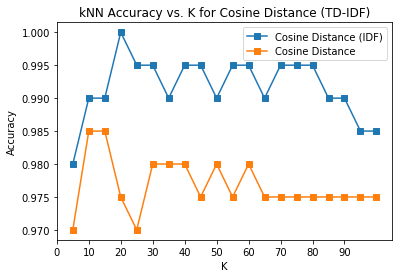

In [23]:
plt.clf()
plt.cla()
plt.close()

x = list(range(5, 101, 5))

plt.plot(x, cosine_idf, label='Cosine Distance (IDF)',marker="s") 
plt.plot(x, cosine_reg, label='Cosine Distance',marker="s") 

plt.xlabel('K')
plt.xticks(range(0,100,10))

plt.ylabel('Accuracy') 
plt.title('kNN Accuracy vs. K for Cosine Distance (TD-IDF)')
plt.legend(loc = 'best') 
plt.show()

Comparing the two Cosine Distances above, we can see that the IDF version is better by about 1.5 - 2% on average.

Create a new classifier based on the Rocchio Method adapted for text categorization [See class notes on Text Categorization]. 

You should separate the training function from the classifiation function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. 

In [24]:
# First without TDIDF
def rocchio_train(data,labels):
    
    n_rows, n_cols = data.shape
    
    # Get a list of all the classes
    classes =  np.unique(labels)
    
    # Create array of prototypes to return later
    prototypes = {}
    
    # For each class
    for (i, cls) in enumerate(classes):
        
        # Get indexes of all documents that match our class
        indexes = np.array(labels.index[labels.iloc[:, 0] == cls])
        
        # Get all rows (documents) of data that belong to this class)
        docs = data[indexes]
        
        # Add up all rows to get the prototype for the class
        p = np.sum(docs,axis=0)
        
        # Add each prototype to the result
        prototypes.update( {i : p} )
        
    # Return the array of prototypes
    return prototypes

The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes.  

In [25]:
from numpy import dot
from numpy.linalg import norm

def rocchio_classify(prototypes, instance):
    
    cs_best = -1
    p_best = -1
    
    # Obtain cosine similarity between instance and each prototype
    for k, v in prototypes.items():
        cs = dot(instance, v)/(norm(instance)*norm(v))
        
        # If cosine similarity greater than previous best, replace it
        if cs > cs_best:
            cs_best = cs
            
            # Update the most_likely prototype class
            p_best = k
            
    return p_best

Finally, use your evaluation function to compare your results to the best KNN results you obtained in part d. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario.]

In [26]:
# Store the prototypes - first for the total frequency, not the TFIDF
prototypes = rocchio_train(dtm_train,train_labels)

In [27]:
def rocchio_evaluate(data, labels, prototypes):
    total = len(data)
    correct = 0
    
    for i in range(len(data)):
        label = rocchio_classify(prototypes,data[i])
        if label == labels[i]: 
            correct += 1
    print("Correct: {}, Total: {}".format(correct,total))
    return correct/total

In [28]:
# Evaluate the accuracy of the test set for non-TFIDF
rocchio_evaluate(dtm_test,test_labels_arr,prototypes)

Correct: 195, Total: 200


0.975

In [29]:
# Now evaluate for TFIDF
prototypes_idf = rocchio_train(dtm_train_idf,train_labels)

In [30]:
def rocchio_evaluate_idf(data, labels, prototypes):
    total = len(data)
    correct = 0
    
    for i in range(len(data)):
        x_tfidf = data[i] * IDF.T[i]  
        label = rocchio_classify(prototypes,x_tfidf)
        if label == labels[i]: 
            correct += 1
    print("Correct: {}, Total: {}".format(correct,total))
    return correct/total

In [31]:
rocchio_evaluate_idf(dtm_test,test_labels_arr,prototypes_idf)

Correct: 196, Total: 200


0.98

The best kNN score I got was 100%, which was with the kNN Consine Distance IDF with k=20, but the average for the kNN Cosine Distance IDF was about 99.5%. With the Rocchio, I got 97.5% with the raw frequencies and 98% with the IDF. Although the kNN did outperform the Rocchio, it's important to note that the Rocchio is much faster.

__2. Classification using scikit-learn [Dataset: bank_data.csv] For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.__

[Note: This module is already part of the Anaconda distributions. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document.

In [32]:
DATA_PATH = "/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/bank_data2.csv"

Load and preprocess the data using Pandas or similar tools. 

In [33]:
# Using SSF output from last assignment
X = pd.read_csv(DATA_PATH)

# Get rid of id
X = X.drop('id',1)

X.head(10)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
5,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
6,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES
7,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
8,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
9,54,24212.10,2,MALE,TOWN,YES,YES,YES,YES,NO,NO


Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. 

In [34]:
y = X['pep']
X = X.drop('pep',1)
y.head(10)

0    YES
1     NO
2     NO
3     NO
4     NO
5    YES
6    YES
7     NO
8     NO
9     NO
Name: pep, dtype: object

You will need to convert the selected dataset into the Standard Spreadsheet format (i.e., convert categorical attributes into numeric by creating dummy variables). 

In [35]:
X_ssf = pd.get_dummies(X,columns=['gender','region','married','car','savings_acct',
                                    'current_acct','mortgage'])
X_ssf.sample(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
350,33,31207.10,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1
422,22,11411.00,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0
173,34,26999.40,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
445,40,31864.80,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
539,19,10191.80,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1
596,30,9672.25,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
579,47,25127.70,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0
88,30,15848.70,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1
119,64,45765.00,3,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0
429,35,27863.90,2,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1


In [36]:
# Normalize
# Perform min-max normalization
X_ssf_norm = (X_ssf-X_ssf.min())/(X_ssf.max()-X_ssf.min())

X_ssf_norm.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,0.612245,0.215634,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.448980,0.431395,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.673469,0.198933,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.102041,0.264320,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.795918,0.783987,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,0.795918,0.565343,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,0.081633,0.066468,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,0.816327,0.342977,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
8,0.387755,0.349132,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9,0.734694,0.330338,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


Finally, split the transformed data into training and test sets (using 80%-20% randomized split). 
[Review Jupyter Notebooks from class to see examples of how to perform these tasks.]

In [37]:
from sklearn.model_selection import train_test_split

SEED = 0

X_train, X_test, y_train, y_test = train_test_split(X_ssf_norm, y, test_size=0.2, random_state=SEED)
X_test.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
434,0.591837,0.310139,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
122,0.367347,0.271609,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
224,0.795918,0.771909,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
479,0.571429,0.660427,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
205,0.000000,0.161305,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
569,0.632653,0.222486,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
432,0.571429,0.203646,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
526,0.285714,0.163425,0.666667,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
439,0.020408,0.179003,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
162,0.632653,0.270052,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1).

In [38]:
from sklearn import neighbors, tree, naive_bayes
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [39]:
knnpreds_test = knnclf.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

# First without weighting

for i in range(1,11):
    K = i
    knn = neighbors.KNeighborsClassifier(K)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    print("K:",K)
    print("Train:",train_score)
    print("Test: ",test_score)

K: 1
Train: 1.0
Test:  0.5833333333333334
K: 2
Train: 0.81875
Test:  0.6
K: 3
Train: 0.8145833333333333
Test:  0.6166666666666667
K: 4
Train: 0.7625
Test:  0.5916666666666667
K: 5
Train: 0.775
Test:  0.6083333333333333
K: 6
Train: 0.7833333333333333
Test:  0.625
K: 7
Train: 0.76875
Test:  0.6166666666666667
K: 8
Train: 0.78125
Test:  0.6083333333333333
K: 9
Train: 0.7708333333333334
Test:  0.6166666666666667
K: 10
Train: 0.7666666666666667
Test:  0.6083333333333333


Generate the __confusion matrix__ (visualize it using Matplotlib), as well as the __classification report__. 

Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

[[49 12]
 [33 26]]


              precision    recall  f1-score   support

          NO       0.60      0.80      0.69        61
         YES       0.68      0.44      0.54        59

    accuracy                           0.62       120
   macro avg       0.64      0.62      0.61       120
weighted avg       0.64      0.62      0.61       120



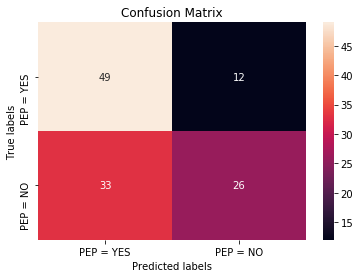

In [41]:
K = 6
knn = neighbors.KNeighborsClassifier(K)
knn.fit(X_train, y_train)
knnpreds_test = knn.predict(X_test)

print(confusion_matrix(y_test, knnpreds_test))
print("\n")
print(classification_report(y_test, knnpreds_test))

# Using HeatMap courtesy of @akilat90 via StackOverflow: 
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

import seaborn as sns
import matplotlib.pyplot as plt     

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, knnpreds_test), annot=True, ax = ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['PEP = YES', 'PEP = NO']); ax.yaxis.set_ticklabels(['PEP = YES', 'PEP = NO']);

In [42]:
# Then with weighting

for i in range(1,11):
    K = i
    knn = neighbors.KNeighborsClassifier(K, weights='distance')
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    print("K:",K)
    print("Train:",train_score)
    print("Test: ",test_score)
    print("\n")

K: 1
Train: 1.0
Test:  0.5833333333333334


K: 2
Train: 1.0
Test:  0.5833333333333334


K: 3
Train: 1.0
Test:  0.625


K: 4
Train: 1.0
Test:  0.5916666666666667


K: 5
Train: 1.0
Test:  0.6416666666666667


K: 6
Train: 1.0
Test:  0.625


K: 7
Train: 1.0
Test:  0.6333333333333333


K: 8
Train: 1.0
Test:  0.6166666666666667


K: 9
Train: 1.0
Test:  0.625


K: 10
Train: 1.0
Test:  0.6




[[43 18]
 [25 34]]
              precision    recall  f1-score   support

          NO       0.63      0.70      0.67        61
         YES       0.65      0.58      0.61        59

    accuracy                           0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120



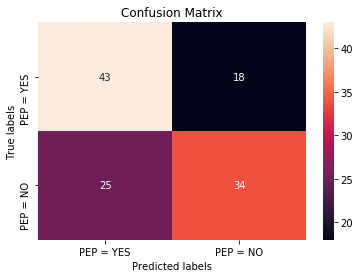

In [43]:
K = 5
knn = neighbors.KNeighborsClassifier(K, weights='distance')
knn.fit(X_train, y_train)
knnpreds_test = knn.predict(X_test)
print(confusion_matrix(y_test, knnpreds_test))
print(classification_report(y_test, knnpreds_test))

# Using HeatMap courtesy of @akilat90 via StackOverflow: 
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, knnpreds_test), annot=True, ax = ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['PEP = YES', 'PEP = NO']); ax.yaxis.set_ticklabels(['PEP = YES', 'PEP = NO']);

The accuracies are pretty similar, but the best K I found was for weighted distance with K = 5. I checked K = 1 - 10 for both weighted and unweighted distances. It's important to note that with weighting there was substantial overfitting . All of my K values generated a training accuracy of 1.0 with distance weighting, yet the test results were not much different than those generated without weighting.

Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). 

In [44]:
# First break up training and testing data from non-normalized dataset

SEED = 0

X_train, X_test, y_train, y_test = train_test_split(X_ssf, y, test_size=0.2, random_state=SEED)
X_test.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
434,47,23038.2,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,1,0
122,36,20799.0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1
224,57,49874.4,3,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0
479,46,43395.5,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0
205,18,14388.6,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1
569,49,17944.2,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1
432,46,16849.3,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1
526,32,14511.8,2,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1
439,19,15417.1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0
162,49,20708.5,3,1,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0


In [45]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(X_train, y_train)
treepreds_test = treeclf.predict(X_test)

As above, generate the confusion matrix, classification report, and average accuracy scores the classifier.

[[50 11]
 [14 45]]


              precision    recall  f1-score   support

          NO       0.78      0.82      0.80        61
         YES       0.80      0.76      0.78        59

    accuracy                           0.79       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.79      0.79      0.79       120



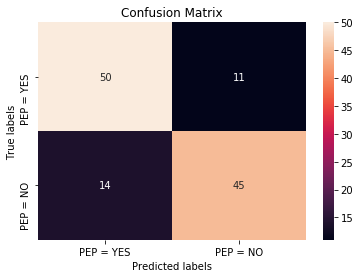

In [46]:
# TESTING

print(confusion_matrix(y_test, treepreds_test))
print("\n")
print(classification_report(y_test, treepreds_test))

# Using HeatMap courtesy of @akilat90 via StackOverflow: 
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, treepreds_test), annot=True, ax = ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['PEP = YES', 'PEP = NO']); ax.yaxis.set_ticklabels(['PEP = YES', 'PEP = NO']);

Compare the average accuracy score on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [47]:
print("Train:",treeclf.score(X_train, y_train))
print("Test: ",treeclf.score(X_test, y_test))

Train: 1.0
Test:  0.7916666666666666


In this instance, it appears that we have a low bias and high variance which has led to overfitting. We would like to increase the bias and decrease the variance so that our model will generalize better on new datapoints.

Create another decision tree model (trained on the non-normalized training data) using "entropy" as the selection criteria, min_samples_split=10, and max_depth=5. For this model generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

In [48]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=5)
treeclf = treeclf.fit(X_train, y_train)

In [49]:
!pip install graphviz

In [50]:
import graphviz
from sklearn.tree import export_graphviz

OUT_PATH = "/Users/claytoncohn/Dropbox/New/DePaul/DSC478/Assignment2/"

export_graphviz(treeclf,out_file=OUT_PATH + 'tree.dot', feature_names=X_train.columns, class_names=y_train.unique(),rounded=True, filled=True)

In [51]:
# Will convert to .png to make more readable inline
from graphviz import render
render('dot', 'png', OUT_PATH + 'tree.dot')

'/Users/claytoncohn/Dropbox/New/DePaul/DSC478/Assignment2/tree.dot.png'

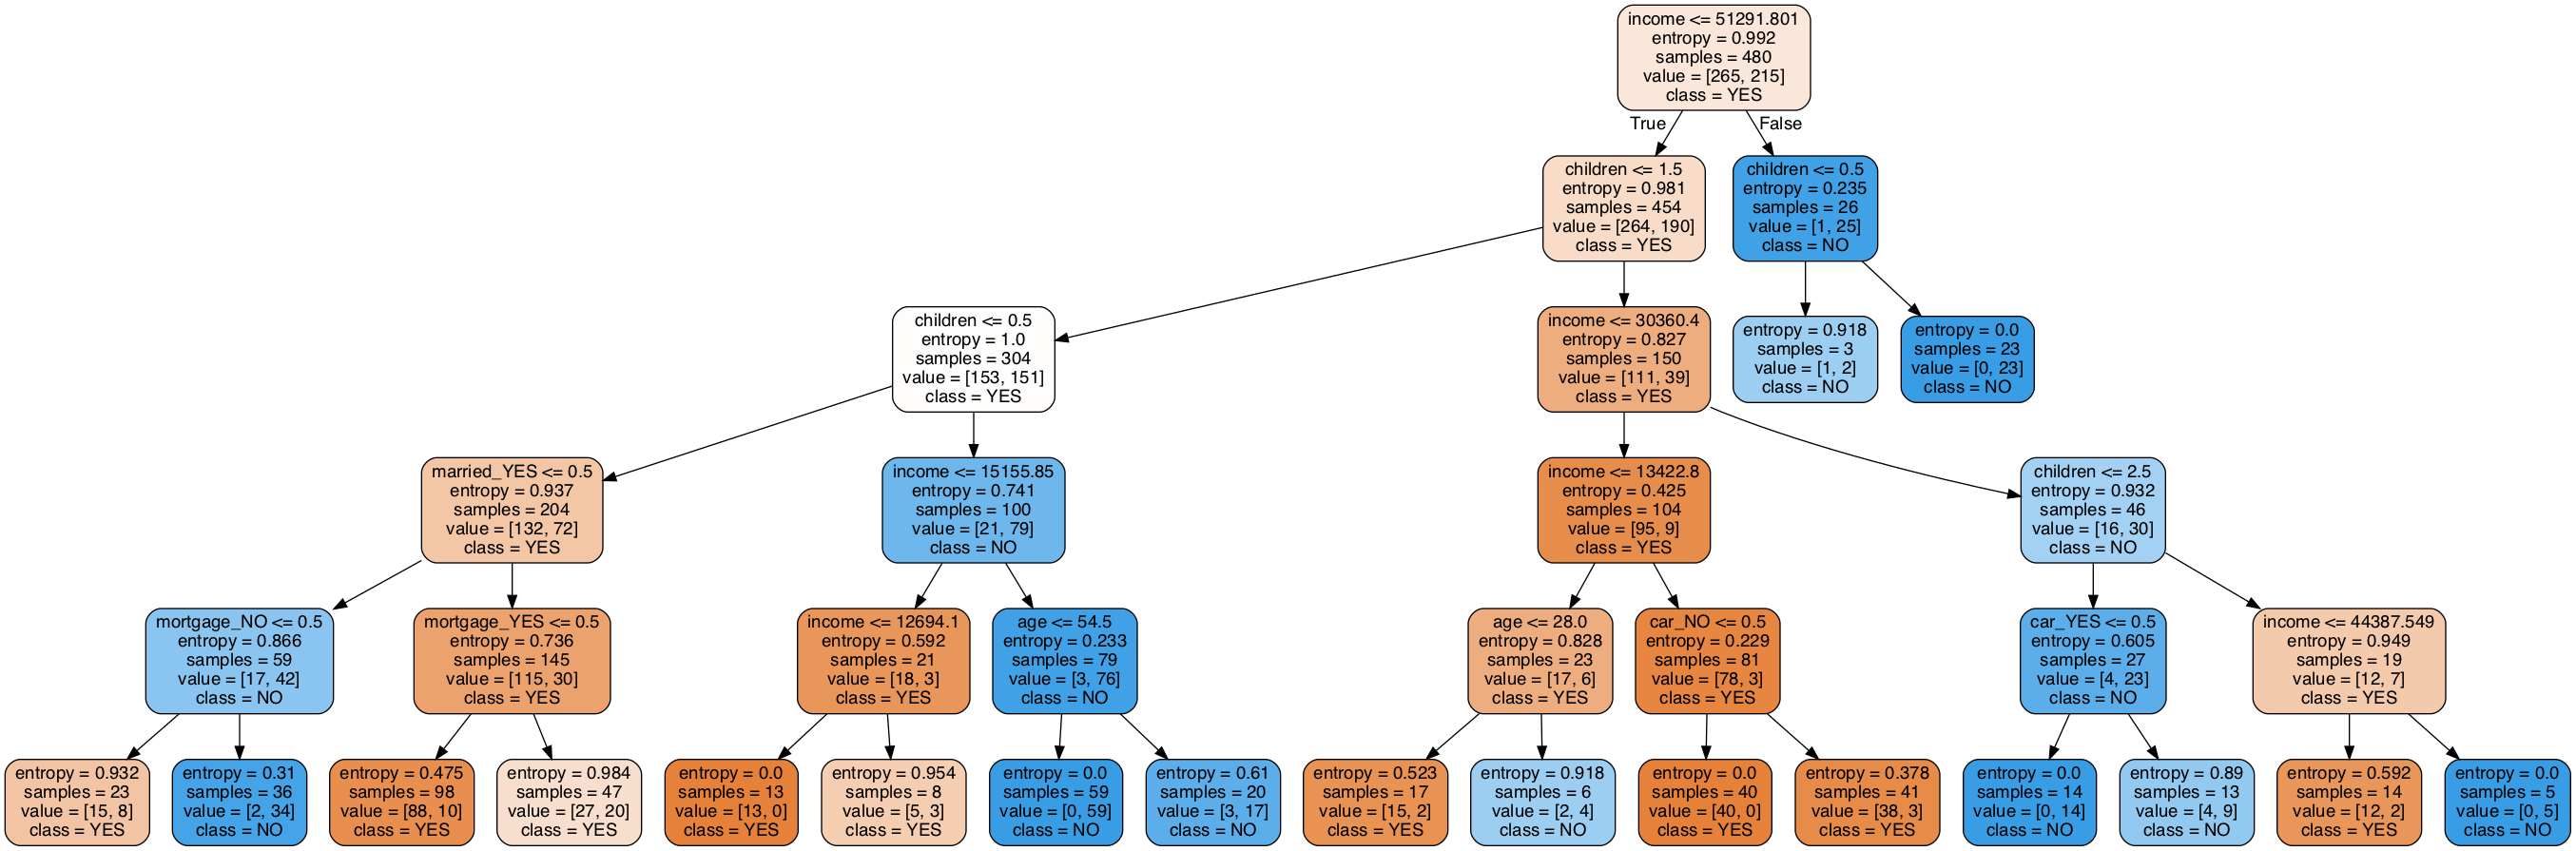

In [52]:
from IPython.display import Image
Image(filename=OUT_PATH + 'tree.dot.png') 

__3. Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv] <br><br>For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.__